In [1]:
%matplotlib inline
import sys
sys.path.append('../source/')
sys.path.append('../utilities/')
from common_imports import * # The number of CPU cores used can be changed in this file.
import dataset_utils, plots_utils,  RBM_utils, evaluate_learning_utils
import rbm10

../source/numba_utilities10.py:22: NumbaWarning: Cannot cache compiled function "dot_Potts_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature,parallel=True,cache=True,nogil=False)
../source/numba_utilities10.py:39: NumbaWarning: Cannot cache compiled function "dot_Potts2_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature,parallel=True,cache=True,nogil=False)
../source/numba_utilities10.py:56: NumbaWarning: Cannot cache compiled function "dot_Potts3_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature,parallel=True,cache=True,nogil=False)
../source/numba_utilities10.py:75: NumbaWarning: Cannot cache compiled function "compute_output_C" as it uses dynamic globals (such as ctypes pointers and large global arrays)
  @njit(signature,parallel=True,cache=True,nogil=False)
../source/numba_utilities10.py:97: NumbaWarning: Cannot cache compiled function "comp

# Oscillator dataset
Subset of 121 neurons within the hindbrain oscillator of the zebrafish. First train the model on the full data set.

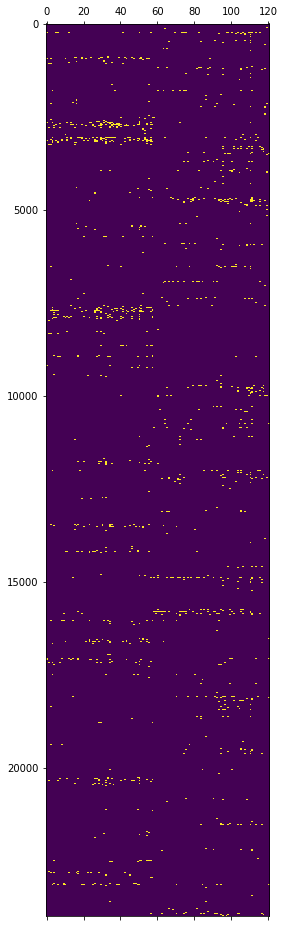

In [5]:
plt.matshow(all_data,aspect='auto')

In [8]:
dataset_utils.load_Oscillateur_zebrafish(globals(),path='../../data/')
all_data = np.concatenate( (train_data,test_data), axis=0 )
all_weights = None
N = train_data.shape[1]


RBM = rbm10.RBM(n_v= N,n_h = 20, visible='Bernoulli',hidden='dReLU',interpolate=True)
RBM.fit(all_data.copy(), weights=all_weights, verbose=0,vverbose=1,n_iter = 200)


l,l_test = evaluate_learning_utils.likelihood(RBM,train_data,test_data,weights=train_weights,weights_test=test_weights)
print('Likelihood (train/test): %.2f l, %.2f l_test'%(l,l_test)) # Here, we used the full data set for training, but it can be split for cross-validation instead.



Starting epoch 1


../source/layer10.py:1096: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1/(1+ (etg_minus/np.sqrt(self._gamma_minus))/(etg_plus/np.sqrt(self._gamma_plus)) )
../source/layer10.py:1062: RuntimeWarning: overflow encountered in true_divide
  p_plus = 1/(1+ (etg_minus/np.sqrt(self._gamma_minus))/(etg_plus/np.sqrt(self._gamma_plus)) )


Starting epoch 2
Starting epoch 3
Starting epoch 4
Starting epoch 5
Starting epoch 6
Starting epoch 7
Starting epoch 8
Starting epoch 9
Starting epoch 10
Starting epoch 11
Starting epoch 12
Starting epoch 13
Starting epoch 14
Starting epoch 15
Starting epoch 16
Starting epoch 17
Starting epoch 18
Starting epoch 19
Starting epoch 20
Starting epoch 21
Starting epoch 22
Starting epoch 23
Starting epoch 24
Starting epoch 25
Starting epoch 26
Starting epoch 27
Starting epoch 28
Starting epoch 29
Starting epoch 30
Starting epoch 31
Starting epoch 32
Starting epoch 33
Starting epoch 34
Starting epoch 35
Starting epoch 36
Starting epoch 37
Starting epoch 38
Starting epoch 39
Starting epoch 40
Starting epoch 41
Starting epoch 42
Starting epoch 43
Starting epoch 44
Starting epoch 45
Starting epoch 46
Starting epoch 47
Starting epoch 48
Starting epoch 49
Starting epoch 50
Starting epoch 51
Starting epoch 52
Starting epoch 53
Starting epoch 54
Starting epoch 55
Starting epoch 56
Starting epoch 57


## Assess quality of the generated data

Mismatch dimensions (1, 20), [200, 20], reinitializating I
Mismatch dimensions (1, 121), [200, 121], reinitializating I


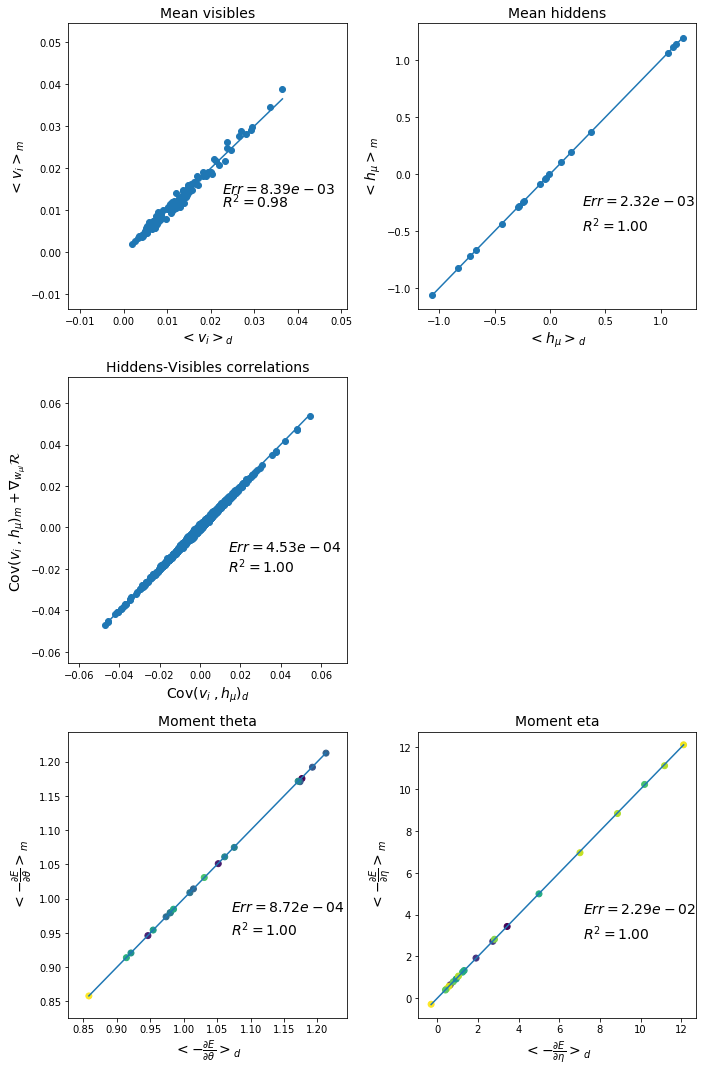

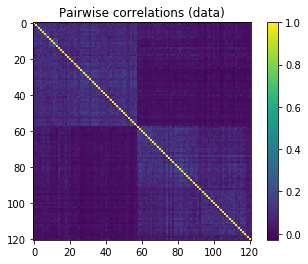

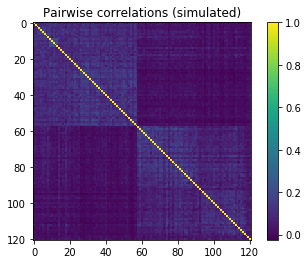

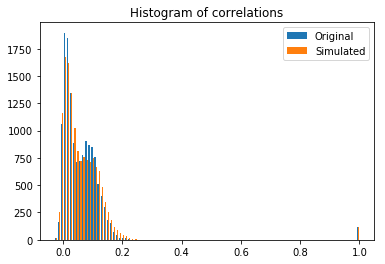

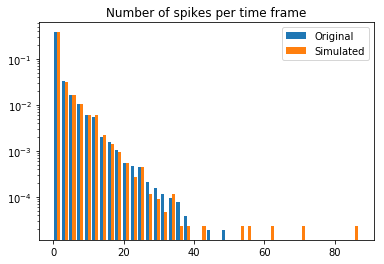

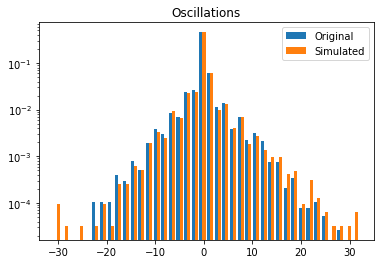

In [8]:
data_gen, datah_gen = RBM.gen_data(Nchains=200,Lchains=100,Nthermalize=1000,Nstep=100)

fig, errors, r2s = evaluate_learning_utils.assess_moment_matching(RBM, all_data, data_gen, weights=all_weights,datah_gen=datah_gen) # Assess convergence of the moments.
fig.show()

fig2, ax2 = plt.subplots()
correlation_data = np.corrcoef(all_data.T)
correlation_model = np.corrcoef(data_gen.T)
plt.imshow(correlation_data); plt.colorbar(); plt.title('Pairwise correlations (data)'); plt.show()

fig4, ax4 = plt.subplots()
plt.imshow(correlation_model); plt.colorbar(); plt.title('Pairwise correlations (simulated)');plt.show()
fig5, ax5 = plt.subplots()
plt.hist([correlation_data.flatten(),correlation_model.flatten()],bins=100); 
plt.title('Histogram of correlations')
plt.legend(['Original','Simulated']);plt.show()

fig6, ax6 = plt.subplots()
plt.hist([all_data.sum(1),data_gen.sum(1)],normed=True,bins=40,log=True);
plt.title('Number of spikes per time frame')
plt.legend(['Original','Simulated']);plt.show()

fig7, ax7 = plt.subplots()
oscillations_data = (all_data[:,:58].sum(-1) - all_data[:,58:].sum(-1))
oscillations_gen = (data_gen[:,:58].sum(-1) - data_gen[:,58:].sum(-1))
plt.hist([oscillations_data,oscillations_gen],normed=True,bins=40,log=True);
plt.title('Oscillations')
plt.legend(['Original','Simulated']);plt.show()




## Visualizing the learnt weights and effective interaction matrix

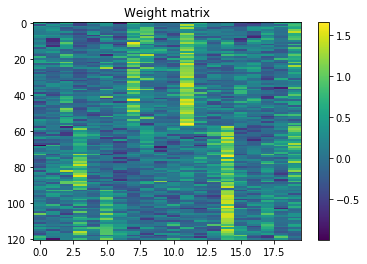

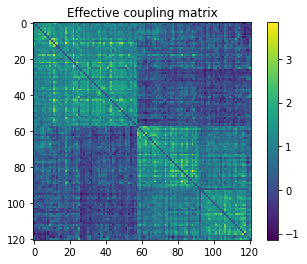

In [9]:
importlib.reload(RBM_utils)
W = RBM.weights.copy()
W *= np.sign( W.sum(1) )[:, np.newaxis] # Flip the sign of the weight so that all positive = excitation.
fig, ax = plt.subplots()
plt.imshow(W.T,aspect='auto'); plt.title('Weight matrix'); plt.colorbar(); plt.show()

fig2, ax2 = plt.subplots()
J = RBM_utils.get_effective_couplings_approx(RBM,all_data)
plt.imshow(J); plt.colorbar(); plt.title('Effective coupling matrix'); plt.show()




# Visualizing the hidden unit input distributions and the non-linearities

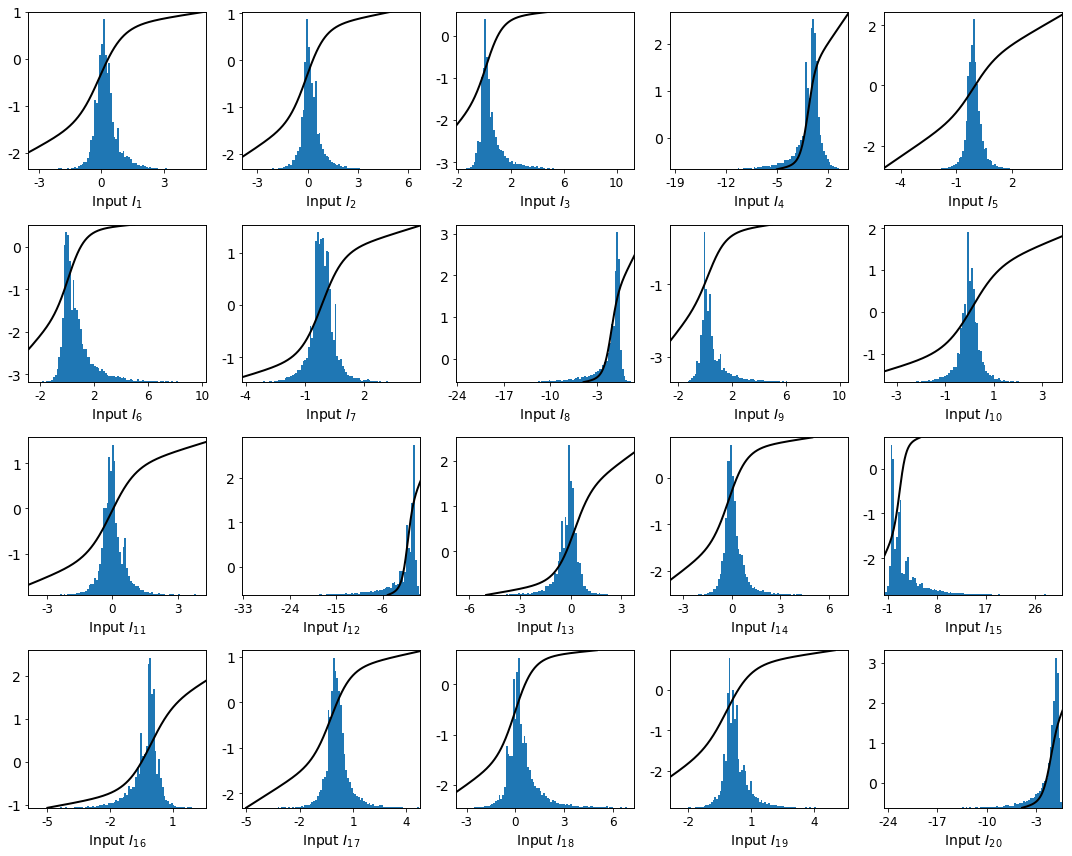

In [10]:
I = RBM.input_hiddens(all_data)
I = I[all_data.sum(1)>0] # Show only data points with at least one spike
I_range = np.arange(-5,5,0.01)
plots_utils.plot_input_mean(RBM,I,np.arange(RBM.n_h),ncols=5,I_range=I_range);

# Generating oscillations with RBMs?
The RBM generates positive and negative phases, but we don't find a nice periodicity similar to the data

Mismatch dimensions (200, 20), [1, 20], reinitializating I
Mismatch dimensions (200, 121), [1, 121], reinitializating I


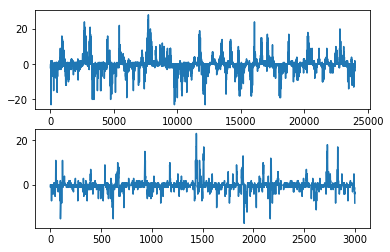

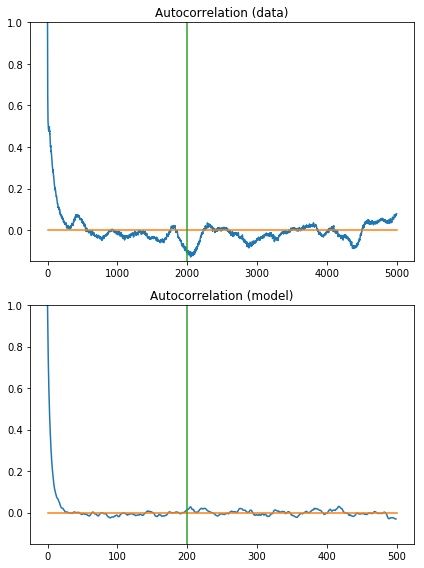

In [11]:
oscillations_data = (all_data[:,:58].sum(-1) - all_data[:,58:].sum(-1))
data_gen2,_ = RBM.gen_data(Nthermalize=1000,Nchains=1,Lchains=30000,Nstep=2)
oscillations_gen = (data_gen2[:,:58].sum(-1) - data_gen2[:,58:].sum(-1))

fig, ax = plt.subplots(2,1)
ax[0].plot(oscillations_data);
ax[1].plot(oscillations_gen[:3000]); plt.show()


fig, ax = plt.subplots(2,1)
fig.set_figheight(8)
ax[0].plot(evaluate_learning_utils.auto_correl(oscillations_data[np.newaxis,:,np.newaxis],nmax=5000))
ax[0].plot([0,5000],[0,0])
ax[0].plot([2000,2000],[-0.15,1])
ax[0].set_ylim([-0.15,1])
ax[0].set_title('Autocorrelation (data)')
ax[1].plot(evaluate_learning_utils.auto_correl(oscillations_gen[np.newaxis,:,np.newaxis],nmax=500))
ax[1].plot([0,500],[0,0])
ax[1].plot([200,200],[-0.15,1])
ax[1].set_ylim([-0.15,1])
ax[1].set_title('Autocorrelation (model)')
plt.tight_layout()


# Compare the likelihood with the one of an independent model
- Strong bursts are more likely for the RBM model.
- Strong oscillations are more likely for the RBM model.

-7.6707025 -5.93377


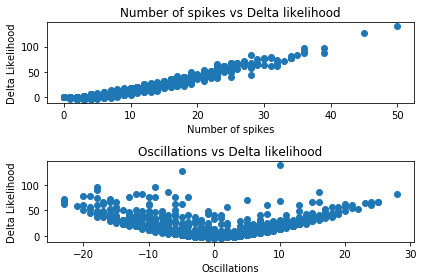

In [13]:
import layer10
ind = layer10.initLayer(N=N,nature='Bernoulli')
ind.init_params_from_data(all_data)
Likelihood_ind = (- ind.energy(all_data) - ind.logpartition(None) )
Likelihood_rbm = RBM.likelihood(all_data)
activity_data = all_data.sum(1)
oscillations_data = (all_data[:,:58].sum(-1) - all_data[:,58:].sum(-1))

print(Likelihood_ind.mean(),Likelihood_rbm.mean())

fig, ax = plt.subplots(2,1)
ax[0].scatter(activity_data, Likelihood_rbm-Likelihood_ind)
ax[0].set_xlabel('Number of spikes')
ax[0].set_ylabel('Delta Likelihood')
ax[0].set_title('Number of spikes vs Delta likelihood')

ax[1].scatter(oscillations_data, Likelihood_rbm-Likelihood_ind)
ax[1].set_xlabel('Oscillations')
ax[1].set_ylabel('Delta Likelihood')
ax[1].set_title('Oscillations vs Delta likelihood')
plt.tight_layout()